In [1]:
import csv
import math
import decimal
import numpy as np
from matplotlib import pyplot as plt

In [2]:
pzero = 1013 #hPa
tzero = 293 #K
rho = 1.225 #kg/m^3
g = 9.8 #m/s^2
Rd = 287
tau = 6.5
epsilon = 0.622

def compute_es(T):
    A = 2.53e11
    B = -5420
    es = A * np.exp(B / T)
    return es

def compute_ES(T):
    e = 611.2 * np.exp((17.67 * T) / (T + 243.5))
    es = e / 100
    return es

def compute_ei(T):
    A = 3.41e12
    B = -6130
    ei = A * np.exp(B / T)
    return ei

def compute_ws(T, P):
    es = compute_es(T)
    ws = (epsilon * es) / (P - es)
    return ws

def compute_WS(T, P):
    es = compute_es(T)
    ws = (epsilon * es) / P
    return ws

def compute_ws_easy(T):
    P = 622 #hPa
    es = compute_es(T)
    ws = 0.001 * es
    return ws

In [3]:
tc = []
tk = []
td = []
p = []
z = []
es = []
ES = []
ei = []
ws = []
WS = []
ws_easy = []

with open('sounding.txt', 'r') as f:
    for line in f.readlines():
        split_lines = line.split()
        p.append(float(split_lines[0]))
        z.append(float(split_lines[1]))
        tc.append(float(split_lines[2]))
        tk.append(float(split_lines[2]) + 273.)
        td.append(float(split_lines[3]) + 273.)
        es.append(compute_es(float(split_lines[2]) + 273.))
        ES.append(compute_ES(float(split_lines[2]) + 273.))
        ei.append(compute_ei(float(split_lines[2]) + 273.))
        ws.append(compute_ws(float(split_lines[2]) + 273., float(split_lines[0])))
        WS.append(compute_WS(float(split_lines[2]) + 273., float(split_lines[0])))
        ws_easy.append(compute_ws_easy(float(split_lines[2]) + 273.))

Text(0.5,0,u'Temperature (K)')

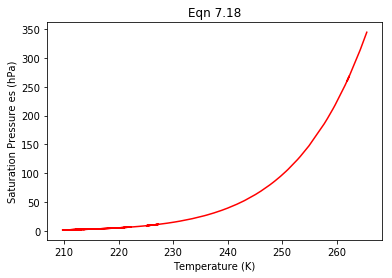

In [4]:
fig = plt.figure()
plt.plot(tk, es, color = 'r')
plt.title('Eqn 7.18')
plt.ylabel('Saturation Pressure es (hPa)')
plt.xlabel('Temperature (K)')

fig.savefig('Eqn 7.18.pdf')

Text(0.5,0,u'Temperature (K)')

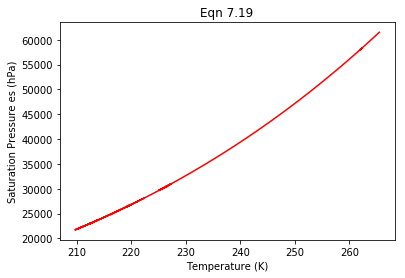

In [5]:
fig = plt.figure()
plt.plot(tk, ES, color = 'r')
plt.title('Eqn 7.19')
plt.ylabel('Saturation Pressure es (hPa)')
plt.xlabel('Temperature (K)')

fig.savefig('Eqn 7.19.pdf')

Text(0.5,0,u'Temperature (K)')

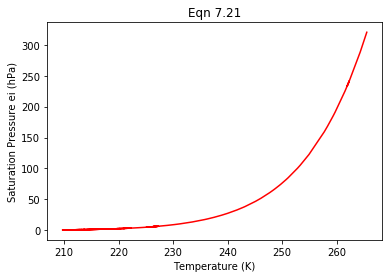

In [6]:
fig = plt.figure()
plt.plot(tk, ei, color = 'r')
plt.title('Eqn 7.21')
plt.ylabel('Saturation Pressure ei (hPa)')
plt.xlabel('Temperature (K)')

fig.savefig('Eqn 7.21.pdf')

Text(0.5,0,u'Temperature (K)')

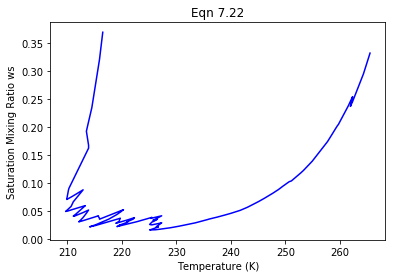

In [7]:
fig = plt.figure()
plt.plot(tk, ws, color = 'b')
plt.title('Eqn 7.22')
plt.ylabel('Saturation Mixing Ratio ws')
plt.xlabel('Temperature (K)')

fig.savefig('Eqn 7.22.pdf')

Text(0.5,0,u'Temperature (K)')

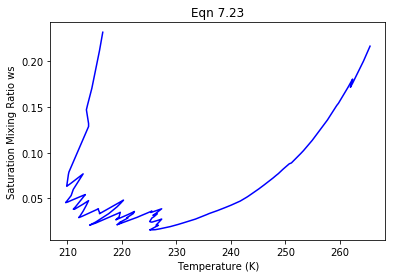

In [8]:
fig = plt.figure()
plt.plot(tk, WS, color = 'b')
plt.title('Eqn 7.23')
plt.ylabel('Saturation Mixing Ratio ws')
plt.xlabel('Temperature (K)')

fig.savefig('Eqn 7.23.pdf')

Text(0.5,0,u'Temperature (K)')

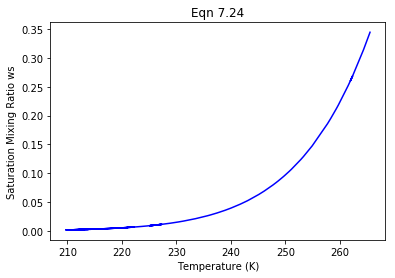

In [9]:
fig = plt.figure()
plt.plot(tk, ws_easy, color = 'b')
plt.title('Eqn 7.24')
plt.ylabel('Saturation Mixing Ratio ws')
plt.xlabel('Temperature (K)')

fig.savefig('Eqn 7.24.pdf')

In [2]:
new_tk = []
new_td = []

for temp, height in zip(tk, z):
    Tz = 0.001 #K/m
    new = tk[0] - (Tz * height)
    new_tk.append(new)
    
for temp, height in zip(td, z):
    Tz = 0.0018 #K/m
    new = td[0] - (Tz * height)
    new_td.append(new)

NameError: name 'tk' is not defined

In [19]:
diff = []

for td, tk in zip(new_td, new_tk):
        diff.append(tk - td)

print min(diff)
print diff.index(min(diff))

1.3248
3
